1. 결측치를 해결하시오
* 자전거대여 데이터 셋에서 결측치를 평균으로 변경하시오
* 단, 평균을 구할 때는 같은 지역(대여소)의 값들의 평균으로 설정해줘야 합니다.
2. 이상치를 해결하시오
* 나이데 대해서만 이상치를 처리하세요
* IQR 1.5를 할 지 IQR 3을 할 지 판단하여 진행하세요
* 이상치는 중앙값으로 처리하세요
3. 중복데이터를 해결하시오 

In [ ]:
# bicycle.csv 데이터 셋 불러오기

In [34]:
import pandas as pd
df = pd.read_csv('../data_set/2.데이터 클린징/bicycle.csv')
df.head()

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,나이
0,SPB-23220,2019-11-01 8:48,646,장한평역 1번출구 (국민은행앞),3.0,2019-11-01 9:01,3,중랑센터,7.0,12.0,1100.0,50
1,SPB-16216,2019-11-04 8:38,646,장한평역 1번출구 (국민은행앞),2.0,2019-11-04 8:56,3,중랑센터,2.0,7.0,1420.0,31
2,SPB-21097,2019-11-04 8:46,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-04 8:57,3,중랑센터,7.0,10.0,NaN,32
3,SPB-22292,2019-11-05 8:34,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-05 8:45,3,중랑센터,NaN,10.0,1380.0,21
4,SPB-07935,2019-11-05 12:29,512,뚝섬역 1번 출구 옆,11.0,2019-11-05 12:39,3,중랑센터,7.0,10.0,1650.0,120


# 1. 결측치를 해결하시오
* 자전거대여 데이터 셋에서 결측치를 평균으로 변경하시오
* 단, 평균을 구할 때는 같은 지역(대여소)의 값들의 평균으로 설정해줘야 합니다.

In [ ]:
# 결측 데이터 확인하기 

In [3]:
df.isnull().sum()

자전거번호       0
대여일시        0
대여소번호       0
대여소명        0
대여거치대      23
반납일시        0
반납대여소번호     0
반납대여소명      0
반납거치대      11
이용시간       11
이용거리       11
나이          0
dtype: int64

In [ ]:
# 대여소번호가 646과 같은 평균값 확인 

In [11]:
print(df[df['대여소번호']==646].mean(numeric_only=True))
# numeric_only=True :  숫자 데이터만 선택하여 평균을 계산

대여소번호       646.000000
대여거치대         4.210526
반납대여소번호       3.000000
반납거치대         4.000000
이용시간         11.444444
이용거리       1256.315789
나이           39.476190
dtype: float64


In [13]:
# 대여거치대가 null값인 데이터 셋 출력

In [14]:
df[ df['대여거치대'].isnull() ]

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,나이
13,SPB-19645,2019-11-14 9:44,646,장한평역 1번출구 (국민은행앞),NaN,2019-11-14 10:01,3,중랑센터,7.0,16.0,1140.0,59
18,SPB-23659,2019-11-21 8:36,646,장한평역 1번출구 (국민은행앞),NaN,2019-11-21 8:44,3,중랑센터,2.0,6.0,1130.0,33
25,SPB-19643,2019-11-06 8:43,419,홈플러스 앞,NaN,2019-11-06 9:26,5,상암센터 정비실,5.0,42.0,450.0,41
29,SPB-21611,2019-11-27 8:34,911,은평평화공원(역촌역4번출구),NaN,2019-11-27 8:55,5,상암센터 정비실,6.0,NaN,5350.0,38
49,SPB-17169,2019-11-01 18:32,148,용강동 주민센터 앞,NaN,2019-11-01 19:05,101,(구)합정동 주민센터,2.0,32.0,5440.0,24
64,SPB-15349,2019-11-02 1:14,104,합정역 1번출구 앞,NaN,2019-11-02 1:20,101,(구)합정동 주민센터,1.0,5.0,1040.0,42
72,SPB-01372,2019-11-02 15:34,104,합정역 1번출구 앞,NaN,2019-11-02 15:43,101,(구)합정동 주민센터,2.0,8.0,1230.0,42
87,SPB-08676,2019-11-02 19:53,101,(구)합정동 주민센터,NaN,2019-11-02 21:13,101,(구)합정동 주민센터,1.0,69.0,2230.0,26
89,SPB-03614,2019-11-02 20:28,419,홈플러스 앞,NaN,2019-11-02 21:15,101,(구)합정동 주민센터,NaN,46.0,5720.0,24
103,SPB-10191,2019-11-03 11:56,105,합정역 5번출구 앞,NaN,2019-11-03 12:35,101,(구)합정동 주민센터,4.0,38.0,1610.0,24


In [ ]:
# 반납거치대가 null 값인 데이터만 확인

In [15]:
df[ df['반납거치대'].isnull() ]

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,나이
3,SPB-22292,2019-11-05 8:34,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-05 8:45,3,중랑센터,NaN,10.0,1380.0,21
23,SPB-19256,2019-11-26 10:20,3,중랑센터,7.0,2019-11-26 10:24,3,중랑센터,NaN,3.0,0.0,29
40,SPB-25272,2019-11-01 8:13,956,응암시장교차로,5.0,2019-11-01 8:42,101,(구)합정동 주민센터,NaN,27.0,6670.0,26
51,SPB-00122,2019-11-01 18:55,113,홍대입구역 2번출구 앞,25.0,2019-11-01 19:14,101,(구)합정동 주민센터,NaN,19.0,2790.0,26
74,SPB-21518,2019-11-02 16:00,116,일진아이윌아파트 옆,3.0,2019-11-02 16:49,101,(구)합정동 주민센터,NaN,46.0,3980.0,22
89,SPB-03614,2019-11-02 20:28,419,홈플러스 앞,NaN,2019-11-02 21:15,101,(구)합정동 주민센터,NaN,46.0,5720.0,24
204,SPB-23327,2019-11-05 22:14,391,정동길입구,2.0,2019-11-05 22:54,101,(구)합정동 주민센터,NaN,37.0,7210.0,55
265,SPB-08123,2019-11-08 11:42,113,홍대입구역 2번출구 앞,19.0,2019-11-08 11:54,101,(구)합정동 주민센터,NaN,11.0,2150.0,43
308,SPB-10067,2019-11-09 21:37,108,서교동 사거리,1.0,2019-11-09 21:58,101,(구)합정동 주민센터,NaN,20.0,1270.0,25
408,SPB-07283,2019-11-14 22:15,152,마포구민체육센터 앞,17.0,2019-11-14 22:26,101,(구)합정동 주민센터,NaN,11.0,0.0,39


In [35]:
# 모든 결측치가 있는 열에 대해서 해당 대여소 번호에 맞는 평균값으로 치환
# 소수점 첫번째 자리까지 구한 후 변경해주세요
# 예) 대여거치대가 NaN값들이 존재한다면 해당 대여거치대의 대여소 번호 중 가튼 대여소 번호~~

df.loc[3] # 결측값 위치 확인 결과 결측값(반납거치대)이 평균값으로 치환 확인

자전거번호              SPB-22292
대여일시         2019-11-05 8:34
대여소번호                    646
대여소명       장한평역 1번출구 (국민은행앞)
대여거치대                    1.0
반납일시         2019-11-05 8:45
반납대여소번호                    3
반납대여소명                  중랑센터
반납거치대                    NaN
이용시간                    10.0
이용거리                  1380.0
나이                        21
Name: 3, dtype: object

In [36]:
nan_list = ['대여거치대', '반납거치대', '이용시간', '이용거리']
for number in df['대여소번호'].unique():
    for name in nan_list:
        mean = round(df.loc[df['대여소번호']==number, name].mean(), 1)
        #df.loc[df['대여소번호']==number, name] = df.loc[df['대여소번호']==number, name].fillna(mean)
        df.loc[df['대여소번호']==number, name] = df[name][df['대여소번호']==number].fillna(mean)
df.loc[3]

자전거번호              SPB-22292
대여일시         2019-11-05 8:34
대여소번호                    646
대여소명       장한평역 1번출구 (국민은행앞)
대여거치대                    1.0
반납일시         2019-11-05 8:45
반납대여소번호                    3
반납대여소명                  중랑센터
반납거치대                    4.0
이용시간                    10.0
이용거리                  1380.0
나이                        21
Name: 3, dtype: object

# 2. 이상치를 해결하시오
* 나이데 대해서만 이상치를 처리하세요
* IQR 1.5를 할 지 IQR 3을 할 지 판단하여 진행하세요
* 이상치는 중앙값으로 처리하세요

In [ ]:
# 나이에 관한 통계값 확인

In [37]:
df['나이'].describe()

count    423.000000
mean      35.562648
std       31.747004
min       21.000000
25%       24.000000
50%       29.000000
75%       40.500000
max      533.000000
Name: 나이, dtype: float64

In [ ]:
# boxplot을 통한 나이 이상치 확인

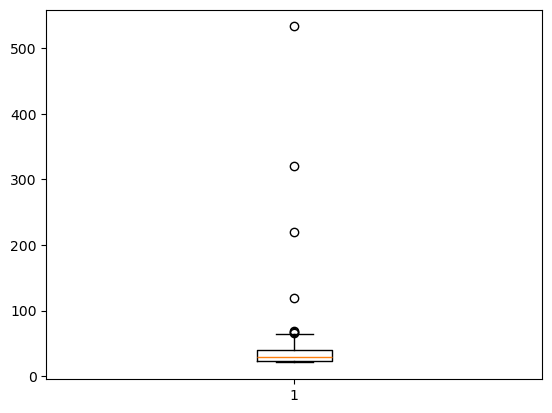

In [38]:
import matplotlib.pyplot as plt
plt.boxplot(df['나이'])
plt.show()

In [ ]:
# 이상치 iqr*1.5를 적용하여 확인해보자 
# 나이 이상치 iqr*1.5 결과값들만 확인 df[이상치보다 큰 값]

In [40]:
import numpy as np
q1, q3 = np.percentile(df['나이'], [25,75])
iqr = q3 - q1
upperfence = q3 + iqr*1.5
print("iqrX1.5 = ",upperfence)

df[df['나이']>upperfence]

iqrX1.5 =  65.25


,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,나이
4,SPB-07935,2019-11-05 12:29,512,뚝섬역 1번 출구 옆,11.0,2019-11-05 12:39,3,중랑센터,7.0,10.0,1650.0,120
30,SPB-20840,2019-11-28 8:32,419,홈플러스 앞,1.0,2019-11-28 8:35,5,상암센터 정비실,5.0,3.0,280.0,533
47,SPB-11637,2019-11-01 15:35,103,망원역 2번출구 앞,4.0,2019-11-01 15:41,101,(구)합정동 주민센터,2.0,5.0,1110.0,320
86,SPB-04854,2019-11-02 19:52,101,(구)합정동 주민센터,5.0,2019-11-02 21:01,101,(구)합정동 주민센터,2.0,33.9,2300.0,220
123,SPB-22075,2019-11-03 21:50,152,마포구민체육센터 앞,19.8,2019-11-03 21:57,101,(구)합정동 주민센터,1.0,6.0,970.0,69
221,SPB-06127,2019-11-06 16:06,1925,동양미래대학교 정문 옆,6.0,2019-11-06 17:09,101,(구)합정동 주민센터,4.0,62.0,12610.0,66
363,SPB-24858,2019-11-12 11:41,113,홍대입구역 2번출구 앞,21.0,2019-11-12 11:54,101,(구)합정동 주민센터,1.0,11.0,2060.0,67


In [ ]:
# 위 코드 확인 결과 iqr*1.5를 적용했더니 연령대가 64세부터 진행된 것을 확인할 수 있다. 
# 따라서 iqr*3 으로 다시 계산해보자 

In [ ]:
# iqr * 3 으로 다시 확인

In [41]:
q1, q3 = np.percentile(df['나이'], [25,75])
iqr = q3 - q1
upperfence = q3 + iqr*3
print("iqrX3 = ",upperfence)

df[df['나이']>upperfence]

iqrX3 =  90.0


,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,나이
4,SPB-07935,2019-11-05 12:29,512,뚝섬역 1번 출구 옆,11.0,2019-11-05 12:39,3,중랑센터,7.0,10.0,1650.0,120
30,SPB-20840,2019-11-28 8:32,419,홈플러스 앞,1.0,2019-11-28 8:35,5,상암센터 정비실,5.0,3.0,280.0,533
47,SPB-11637,2019-11-01 15:35,103,망원역 2번출구 앞,4.0,2019-11-01 15:41,101,(구)합정동 주민센터,2.0,5.0,1110.0,320
86,SPB-04854,2019-11-02 19:52,101,(구)합정동 주민센터,5.0,2019-11-02 21:01,101,(구)합정동 주민센터,2.0,33.9,2300.0,220


### 이상치는 중앙값으로 처리하세요

In [ ]:
# 이상치를 중앙값으로 치환

In [42]:
df[df['나이']>upperfence] = df['나이'].median()

In [ ]:
# 나이에 관련된 중복되지 않은 값 출력 후 확인

In [43]:
df['나이'].unique()

array([50, 31, 32, 21, 29, 30, 26, 53, 54, 34, 57, 59, 51, 33, 27, 41, 43,
       22, 38, 28, 45, 35, 46, 56, 37, 48, 40, 25, 24, 58, 42, 44, 39, 36,
       23, 60, 61, 69, 62, 55, 65, 47, 52, 66, 49, 63, 67], dtype=int64)

# 3. 중복값 삭제

In [ ]:
# 중복 데이터 삭제 전 총 개수 확인

In [44]:
df.shape

(423, 12)

In [ ]:
# 중복 데이터 확인

In [46]:
df.duplicated().sum()

6

In [ ]:
# 중복 데이터 삭제 후 저장
# 중복 데이터 개수 확인 결과 중복처리 된 것 확인 

In [47]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [ ]:
# 삭제 후 총 개수 역시 6개가 지워진 것을 확인 

In [48]:
df.shape

(417, 12)